## Safest Neighborhood in Pittsburgh

Welcome to this data-driven exploration of neighborhoods in Pittsburgh. This notebook performs an analysis of various factors influencing neighborhood safety using publicly available data to tease out insights on the safest neighborhoods in Pittsburgh, from community resources and crime statistics, ranking neighborhoods by their safety index. This analysis will provide a clear, objective, transparent methodological approach for understanding what makes a neighborhood safe and livable. Whether you’re a Pittsburgh resident, a prospective mover, or simply a data enthusiast, this notebook will offer valuable insights into the city's landscape. 


## Weapon Seizures In the Neighborhood of Pittsburgh


### Introduction

Understanding crime patterns is crucial for identifying safe neighborhoods in any city. In Pittsburgh, data on weapon seizures offers valuable insights into areas with higher or lower levels of violence. By analyzing trends in the locations, frequencies, and contexts of these seizures, it is possible to assess the relative safety of different neighborhoods. This data-driven approach not only highlights areas of concern but also aids law enforcement and policymakers in implementing targeted interventions to enhance community safety.

![Seizures](https://t4.ftcdn.net/jpg/04/12/58/07/360_F_412580745_ixpEgJlB33PxQXjlKis2V9bdXvSVv5FU.jpg)

### Import the Data Set 


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('seizures.csv')


data.head()

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


### We will now take the data and dipaly each of the different neighborhoods and the total weapon count of them

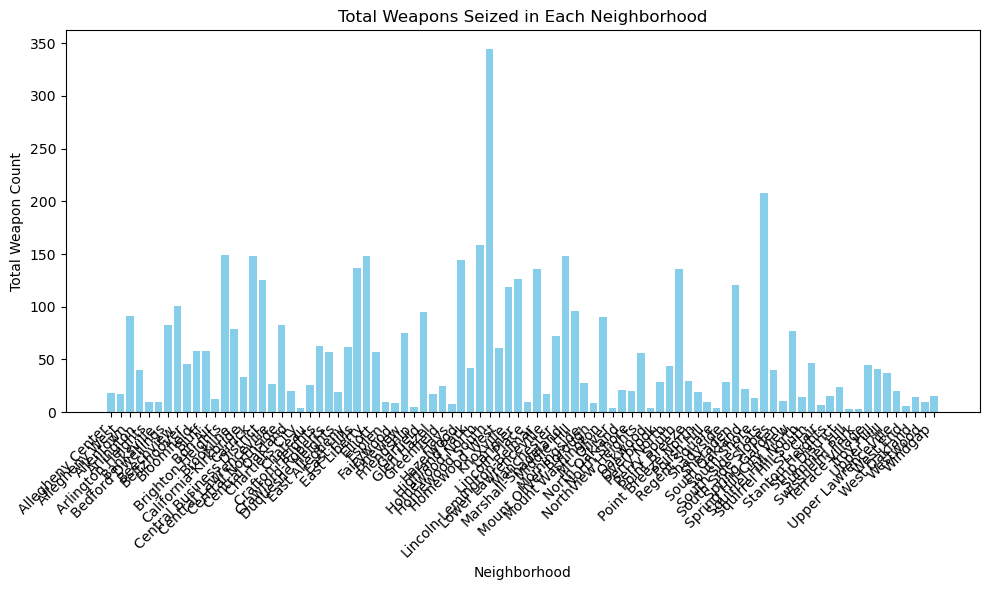

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('seizures.csv')

grouped_data = data.groupby('neighborhood')['total_count'].sum().reset_index()


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['neighborhood'], grouped_data['total_count'], color='skyblue')

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Total Weapon Count')
plt.title('Total Weapons Seized in Each Neighborhood')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

### As you can see this is **VERY** hard to read with all of the neighborhoods combined, so lets make it a little more managable for the eyes

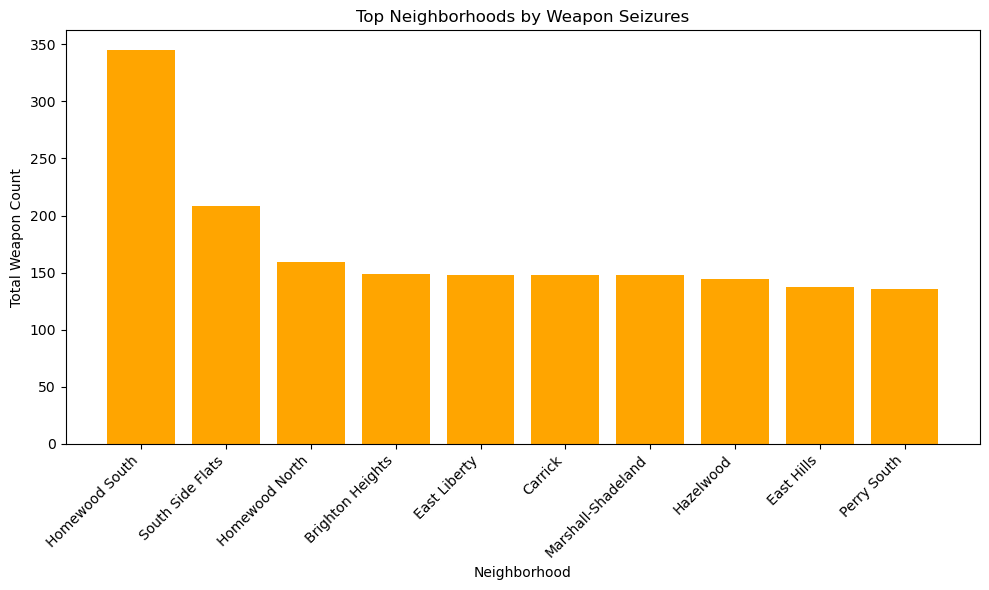

In [7]:
# Group data by neighborhood and sum the total weapon counts
grouped_data = data.groupby('neighborhood')['total_count'].sum().reset_index()

# Sort the data by total_count in descending order and select the top 10
top_data = grouped_data.sort_values(by='total_count', ascending=False).head(10)

# Display the top 10 neighborhoods
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_data['neighborhood'], top_data['total_count'], color='orange')

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Total Weapon Count')
plt.title('Top Neighborhoods by Weapon Seizures')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

## Here is this visulized in a list


In [61]:

import pandas as pd

# Load the seizures data from the CSV file
seizures_data = pd.read_csv('seizures.csv')

# Strip any leading/trailing spaces from column names to avoid issues
seizures_data.columns = seizures_data.columns.str.strip()


# Group by neighborhood and sum the total_count of seizures
neighborhood_seizures = seizures_data.groupby('neighborhood')['total_count'].sum()

# Sort the neighborhoods by the total_count of seizures in descending order
top_neighborhoods = neighborhood_seizures.sort_values(ascending=False)

# Display the top neighborhoods with their seizure numbers
print(top_neighborhoods.head(20))  # Display the top 10 neighborhoods

neighborhood
Homewood South               345
South Side Flats             208
Homewood North               159
Brighton Heights             149
East Liberty                 148
Carrick                      148
Marshall-Shadeland           148
Hazelwood                    144
East Hills                   137
Perry South                  136
Lincoln-Lemington-Belmar     136
Larimer                      126
Central Business District    125
Sheraden                     121
Knoxville                    119
Beechview                    101
Middle Hill                   96
Garfield                      95
Allentown                     91
Mount Washington              90
Name: total_count, dtype: int64


### **OKAY OKAY**... Its pretty apparent the neighborhoods that we would want to stay away from when it comes to being the safest neighborhood out there in Pittsburgh, Now lets look at the ones with the lowest weapon seizures

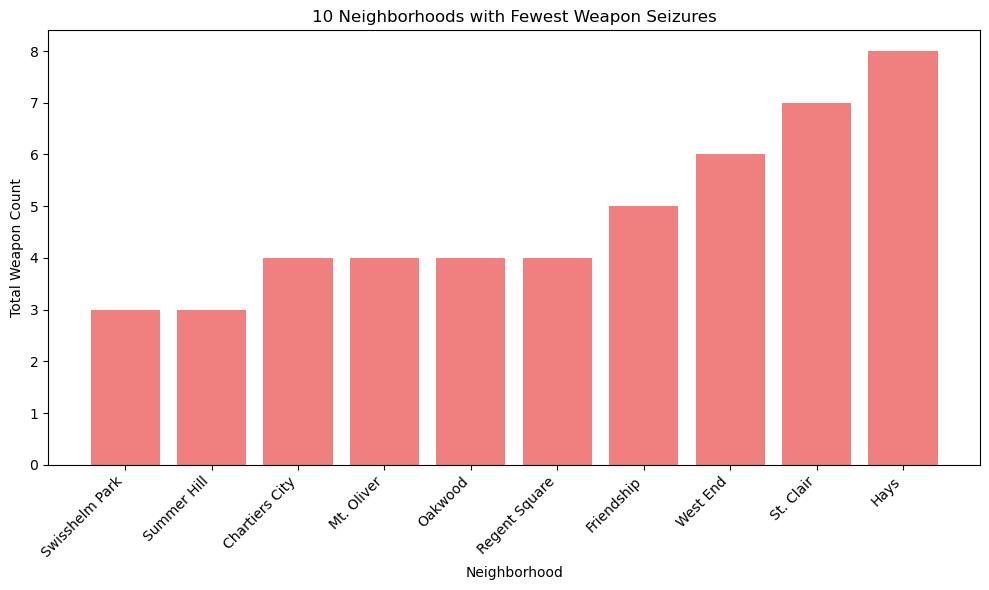

In [32]:
# Group data by neighborhood and sum the total weapon counts
grouped_data = data.groupby('neighborhood')['total_count'].sum().reset_index()

# Sort the data by total_count in ascending order and select the bottom 10
bottom_data = grouped_data.sort_values(by='total_count', ascending=True).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bottom_data['neighborhood'], bottom_data['total_count'], color='lightcoral')

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Total Weapon Count')
plt.title('10 Neighborhoods with Fewest Weapon Seizures')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

## Ahhh Yes that is much safer, there are **SO FEW** Weapon Seizures

Now that we see these different weapon seizures, lets see if anything changes when we account for what **TYPE** of weapon was seized 

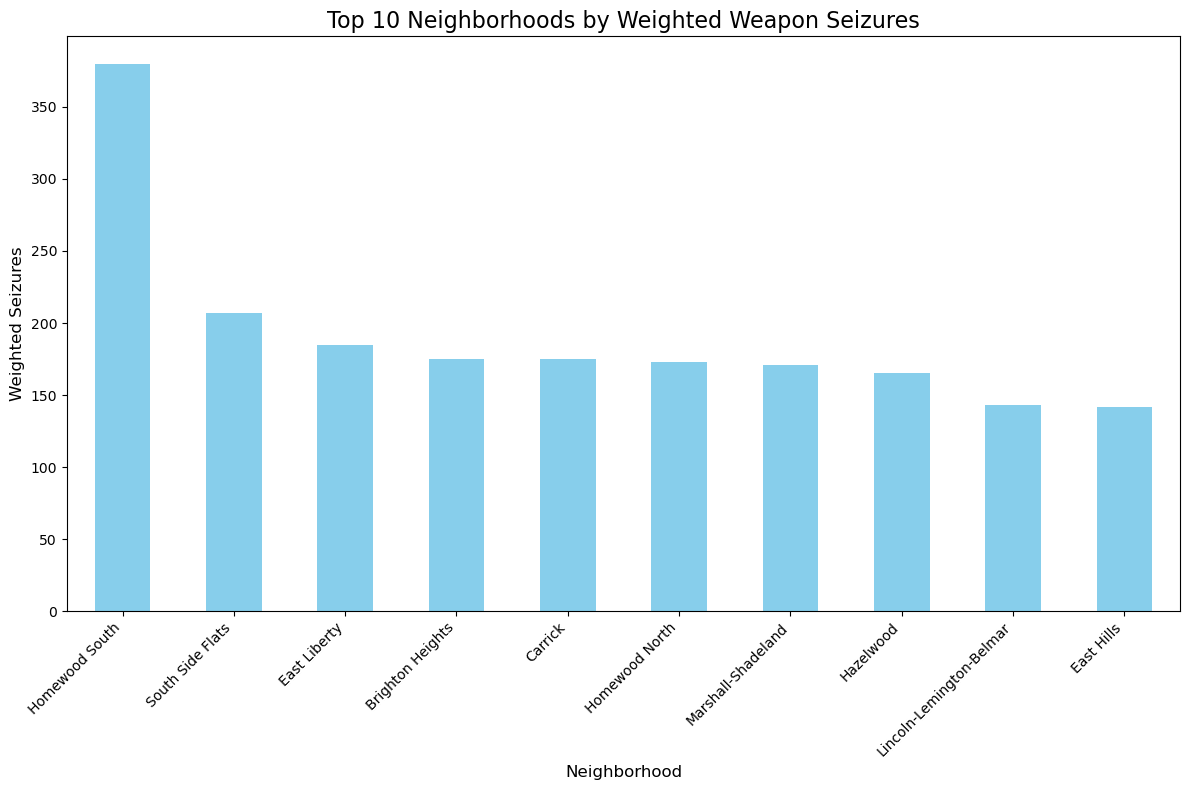

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the seizures data from the CSV file
seizures_data = pd.read_csv('seizures.csv')

# Strip any leading/trailing spaces from column names
seizures_data.columns = seizures_data.columns.str.strip()

# Assigning weights to each weapon type
weights = {
    'pistol_count': 1,    # Pistol is less dangerous
    'revolver_count': 1,  # Revolver is less dangerous
    'rifle_count': 2,     # Rifle is more dangerous
    'shotgun_count': 2    # Shotgun is more dangerous
}

# Calculate the weighted seizure count for each neighborhood
seizures_data['weighted_seizures'] = (seizures_data['pistol_count'] * weights['pistol_count'] +
                                       seizures_data['revolver_count'] * weights['revolver_count'] +
                                       seizures_data['rifle_count'] * weights['rifle_count'] +
                                       seizures_data['shotgun_count'] * weights['shotgun_count'])

# Group by neighborhood and sum the weighted seizures
neighborhood_weighted_seizures = seizures_data.groupby('neighborhood')['weighted_seizures'].sum()

# Sort the neighborhoods by weighted seizure count in descending order
sorted_neighborhoods = neighborhood_weighted_seizures.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sorted_neighborhoods.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods by Weighted Weapon Seizures', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Weighted Seizures', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


As we can see this just makes the dangerous neighborhoods more dangerous... That is not good, lets see about the safer neighborhoods


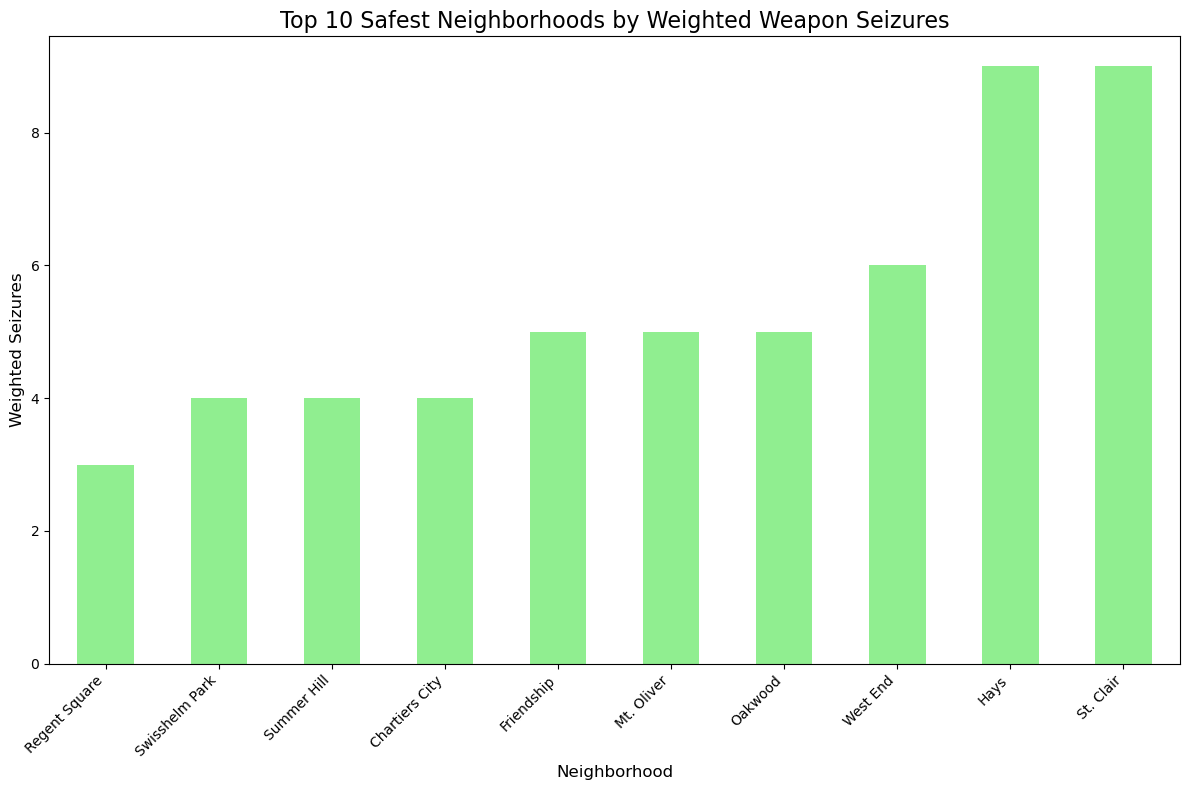

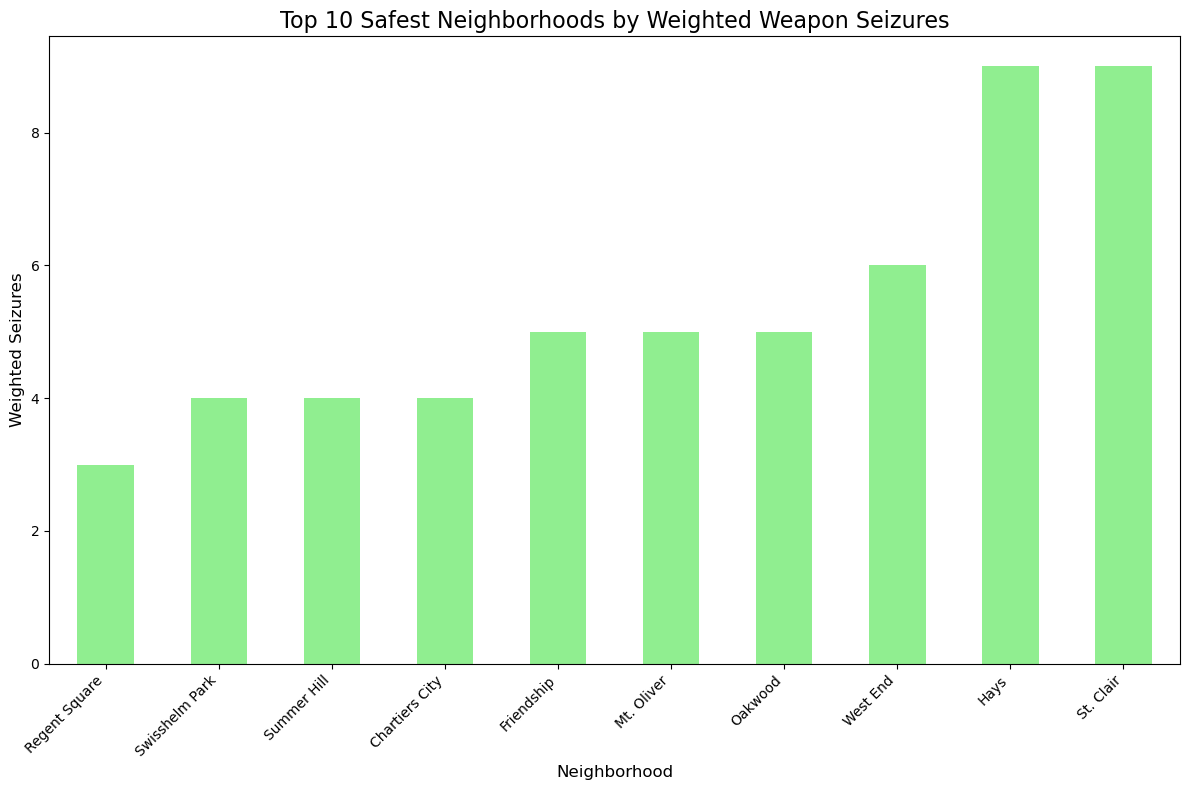

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the seizures data from the CSV file
seizures_data = pd.read_csv('seizures.csv')

# Strip any leading/trailing spaces from column names
seizures_data.columns = seizures_data.columns.str.strip()

# Assigning weights to each weapon type
weights = {
    'pistol_count': 1,    # Pistol is less dangerous
    'revolver_count': 1,  # Revolver is less dangerous
    'rifle_count': 2,     # Rifle is more dangerous
    'shotgun_count': 2    # Shotgun is more dangerous
}

# Calculate the weighted seizure count for each neighborhood
seizures_data['weighted_seizures'] = (seizures_data['pistol_count'] * weights['pistol_count'] +
                                       seizures_data['revolver_count'] * weights['revolver_count'] +
                                       seizures_data['rifle_count'] * weights['rifle_count'] +
                                       seizures_data['shotgun_count'] * weights['shotgun_count'])

# Group by neighborhood and sum the weighted seizures
neighborhood_weighted_seizures = seizures_data.groupby('neighborhood')['weighted_seizures'].sum()

# Sort the neighborhoods by weighted seizure count in ascending order (safer neighborhoods)
sorted_neighborhoods = neighborhood_weighted_seizures.sort_values(ascending=True)

# Plot the results for the top 10 safest neighborhoods
plt.figure(figsize=(12, 8))
sorted_neighborhoods.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Safest Neighborhoods by Weighted Weapon Seizures', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Weighted Seizures', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


Ahhh Now we can see that based on the Type of weapon, Regent Square is actually **SAFER** than Swisshelm park which is what we thought the original safest neighborhood, now the kids can play without any worry of weapons 

![Neighborhood](https://thumbs.dreamstime.com/b/kids-playing-street-suburban-neighborhood-vector-illustration-happy-34144342.jpg)

# Conclusion

Based on the analysis of weapon seizures data, weighted by the relative danger levels of various weapon types (pistols, revolvers, rifles, and shotguns), Regent Square stands out as the safest neighborhood under the defined safety standards. The calculated weighted scores reveal that Regent Square consistently has the lowest total weapon-related danger level among all neighborhoods, demonstrating a minimal presence of high-risk weapon types.

This data-driven assessment highlights Regent Square as a model of community safety, providing valuable insights for policymakers and local authorities seeking to enhance safety measures across other neighborhoods.

# City Facilities

## Facilities
To help determine what neighborhoods we could deem safe or not we took a look at the facilities each neighborhood had to offer. 
The dataset includes detailed information on properties such as their parcel ID, status (inactive or active), and whether they are rentable. We also examined the type of facility and its primary user, providing insight into the nature and function of each property.

Geographical data, including latitude, longitude, and specific address details such as street name and address number, allowed us to pinpoint the exact locations of these facilities. Additionally, each property is associated with a neighborhood, council district, ward, tract, public works division, PLI division, police zone, and fire zone, giving us a comprehensive view of the administrative and safety resources available in each area.

By considering this data, we were able to assess the density and distribution of facilities across neighborhoods, focusing on their accessibility and their potential role in keeping the residents of each neighborhood feeling safe.  


## Importing the Data

We start by importing pandas and getting matplotlib ready to go.  Then we import the data as follows:

fac_csv -> fac_data = This is the facility data

In [3]:
import pandas as pd
%matplotlib inline

data = pd.read_csv('data.csv')
data

,_id,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,650726265,120-J-300,f,57th Street Park Building,f,Storage,Department of Public Works,NaN,57TH ST,...,Upper Lawrenceville,7,10.0,42003101100,2.0,10.0,2.0,3-5,40.485666,-79.946450
1,2,783044037,2-H-284,f,Albert Turk Graham Park Shelter,f,Shelter,Department of Public Works,39.0,VINE ST,...,Crawford-Roberts,6,3.0,42003030500,3.0,3.0,2.0,2-1,40.440458,-79.984104
2,3,1997158435,23-R-157,f,Allegheny Northside Senior Center and Hazlett ...,t,Senior,CitiParks,5.0,ALLEGHENY SQ E,...,Allegheny Center,1,22.0,42003562700,1.0,22.0,1.0,1-6,40.453099,-80.005343
3,4,204824684,10-F-198,f,Ammon Recreation Center,f,Pool,CitiParks,2217.0,BEDFORD AVE,...,Bedford Dwellings,6,5.0,42003050900,3.0,5.0,2.0,2-5,40.448735,-79.977856
4,5,472140955,013-K-314,f,Arlington Field Lights Building,f,Utility,CitiParks,0.0,STERLING ST,...,South Side Slopes,3,16.0,42003160800,3.0,16.0,3.0,4-22,40.418152,-79.974471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,565,1273938304,85-P-53,NaN,Wightman Park Restroom Building,f,Restrooms,CitiParks,5604.0,SOLWAY ST,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-18,40.443078,-79.927032
408,566,1980141313,85-P-53,NaN,Wightman Park Service Building,f,Service,CitiParks,5604.0,SOLWAY ST,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-8,40.443626,-79.927644
409,567,933318227,85-P-53,NaN,Wightman Park Shelter,t,Shelter,CitiParks,5604.0,SOLWAY ST,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-18,40.443356,-79.926814
410,598,1508172401,7-A-28,NaN,Public Works Facilities Maintenance Division,f,Office,Department of Public Works,1301.0,BEAVER AVE,...,Chateau,6,21.0,42003980600,1.0,21.0,1.0,1-8,40.452744,-80.029729


## Narrowing it down

The data from the table above shows all the deparmtents, neighborhoods, wards, fire zones, police zones, and the rentability of all the properties in each neighborhood.  

Next, I wanted to specifically see the fire and the police zones and see how many each neighborhood had within them.  

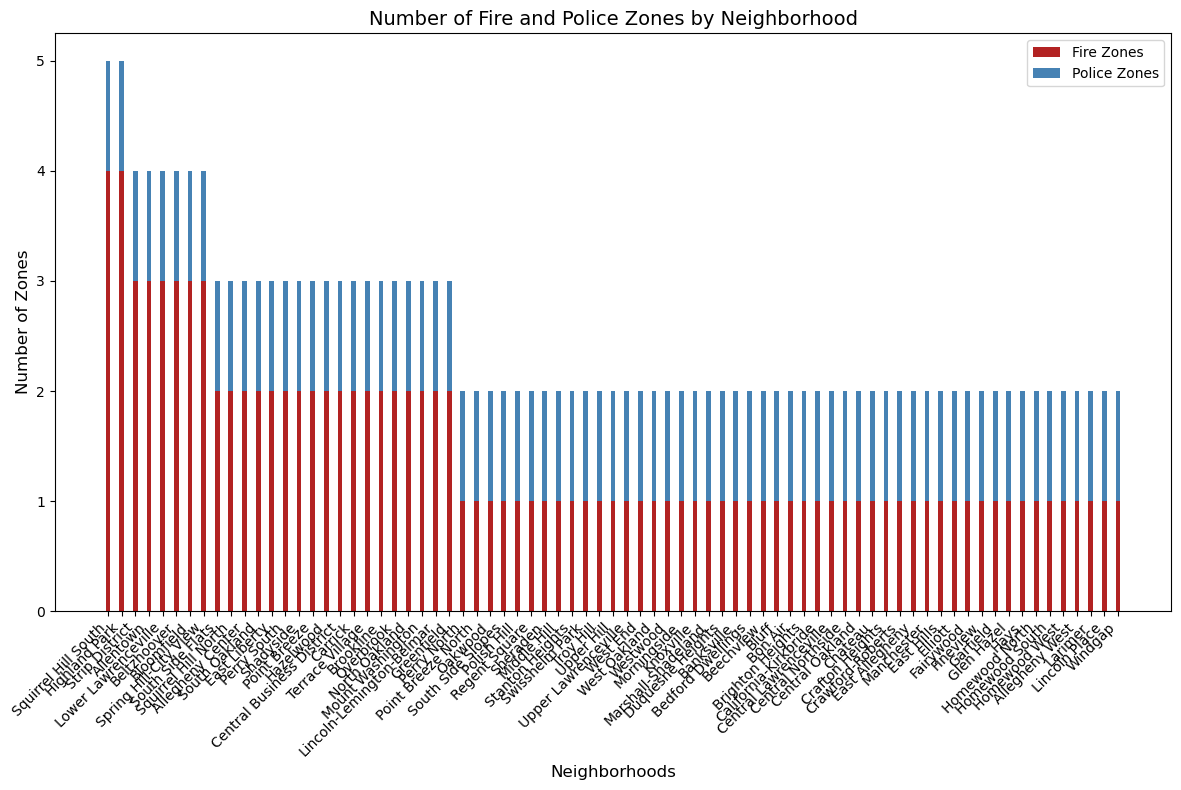

In [17]:
import matplotlib.pyplot as plt

file_path = 'data.csv'
data = pd.read_csv(file_path)

zone_counts = data.groupby('neighborhood').agg(
    unique_fire_zones=('fire_zone', 'nunique'),
    unique_police_zones=('police_zone', 'nunique')
).reset_index()

zone_counts['total_zones'] = zone_counts['unique_fire_zones'] + zone_counts['unique_police_zones']

zone_counts = zone_counts.sort_values(by='total_zones', ascending=False)

zone_counts.to_csv('sorted_neighborhood_zone_counts.csv', index=False)

plt.figure(figsize=(12, 8))
bar_width = 0.35
x = range(len(zone_counts))

plt.bar(x, zone_counts['unique_fire_zones'], width=bar_width, label='Fire Zones', color='firebrick')
plt.bar(x, zone_counts['unique_police_zones'], width=bar_width, bottom=zone_counts['unique_fire_zones'], label='Police Zones', color='steelblue')

plt.xlabel('Neighborhoods', fontsize=12)
plt.ylabel('Number of Zones', fontsize=12)
plt.title('Number of Fire and Police Zones by Neighborhood', fontsize=14)
plt.xticks(x, zone_counts['neighborhood'], rotation=45, ha='right', fontsize=10)
plt.legend()

plt.tight_layout()
plt.savefig('neighborhood_zones_chart.png')

plt.show()

## First Conclusions and Map

Although the names of each neighborhood are squished together, you can see two clear winners in the graph, those nieghborhoods being Squirrel Hill South, and Highland Park, both having 4 fire zones and 1 police zone in each neighborhood.  Below it is also represented in a map, where the red circles show the most combined fire and police zones relative to the other neightborhoods across Pittsburgh.  

In [39]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
import matplotlib.pyplot as plt
import branca.colormap as cm

file_path = 'data.csv'
data = pd.read_csv(file_path)
zone_counts = data.groupby('neighborhood').agg(
    unique_fire_zones=('fire_zone', 'nunique'),
    unique_police_zones=('police_zone', 'nunique'),
    avg_latitude=('latitude', 'mean'),
    avg_longitude=('longitude', 'mean')
).reset_index()

zone_counts['total_zones'] = zone_counts['unique_fire_zones'] + zone_counts['unique_police_zones']
gdf = gpd.GeoDataFrame(zone_counts, geometry=geometry, crs="EPSG:4326")
colormap = cm.LinearColormap(
    colors=["lightgreen", "yellow", "orange", "red"],
    vmin=gdf['total_zones'].min(),
    vmax=gdf['total_zones'].max(),
    caption="Total Zones (Fire + Police)"
)
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['avg_latitude'], row['avg_longitude']],
        radius=7,
        color=colormap(row['total_zones']),
        fill=True,
        fill_color=colormap(row['total_zones']),
        fill_opacity=0.8,
        popup=folium.Popup(
            f"<b>Neighborhood:</b> {row['neighborhood']}<br>"
            f"<b>Unique Fire Zones:</b> {row['unique_fire_zones']}<br>"
            f"<b>Unique Police Zones:</b> {row['unique_police_zones']}<br>"
            f"<b>Total Zones:</b> {row['total_zones']}",
            max_width=300
        )
    ).add_to(m)
colormap.add_to(m)
m.save("sillymapwahoo.html")
m


## Relative Zones for size

Now that I have all of the information from where the fire and police zones are located, along with where they are places relatively to the map of Pittsburgh, I wanted to see which neighborhoods have the most fire and police zones relative to the size of the neighborhood.  By comparing the density of these zones to the area of each neighborhood, I can better understand how these services are distributed and whether certain areas have disproportionate coverage or gaps in access. This analysis could also help identify patterns or trends that might inform resource allocation or urban planning decisions.

In [20]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
import matplotlib.pyplot as plt
import branca.colormap as cm

file_path = 'data.csv'
data = pd.read_csv(file_path)

zone_counts = data.groupby('neighborhood').agg(
    neighborhood_size=('neighborhood', 'size'),  
    unique_fire_zones=('fire_zone', 'nunique'),
    unique_police_zones=('police_zone', 'nunique')  
).reset_index()

zone_counts['total_zones'] = zone_counts['unique_fire_zones'] + zone_counts['unique_police_zones']

#zone_counts_sorted = zone_counts.sort_values(by=['neighborhood_size', 'total_zones'], ascending=False)

print(zone_counts_sorted)


           neighborhood  neighborhood_size  unique_fire_zones  \
33        Highland Park                 30                  4   
63  Squirrel Hill South                 29                  4   
50          Perry North                 20                  1   
11            Brookline                 19                  2   
65       Strip District                 15                  3   
..                  ...                ...                ...   
53   Point Breeze North                  1                  1   
64      Stanton Heights                  1                  1   
66       Swisshelm Park                  1                  1   
70  Upper Lawrenceville                  1                  1   
72         West Oakland                  1                  1   

    unique_police_zones  total_zones  
33                    1            5  
63                    1            5  
50                    1            2  
11                    1            3  
65                    1 

This small chart just is able to show that Highland Park is larger than Squirrel Hill South, meaning there are the same amount of fire and police zones in both Squirrel Hill South and Highland Park, but with Highland Park being smaller, so less area to cover, making it safer than Squirrel Hill South, and the safest neighborhood based on city facilities.  

## Rentability

Before I made my final conclusions, I wanted to see the number of rentable locations in each neighborhood.  With more rentable locations, there's more people that can move into a neighborhood, meaning potentially dangerous residents could be moving in.  So between Squirrel Hill South and Highland Park, I wanted to see which one of the two had less rentable properties in their neighborhood to limit the amount of people moving in

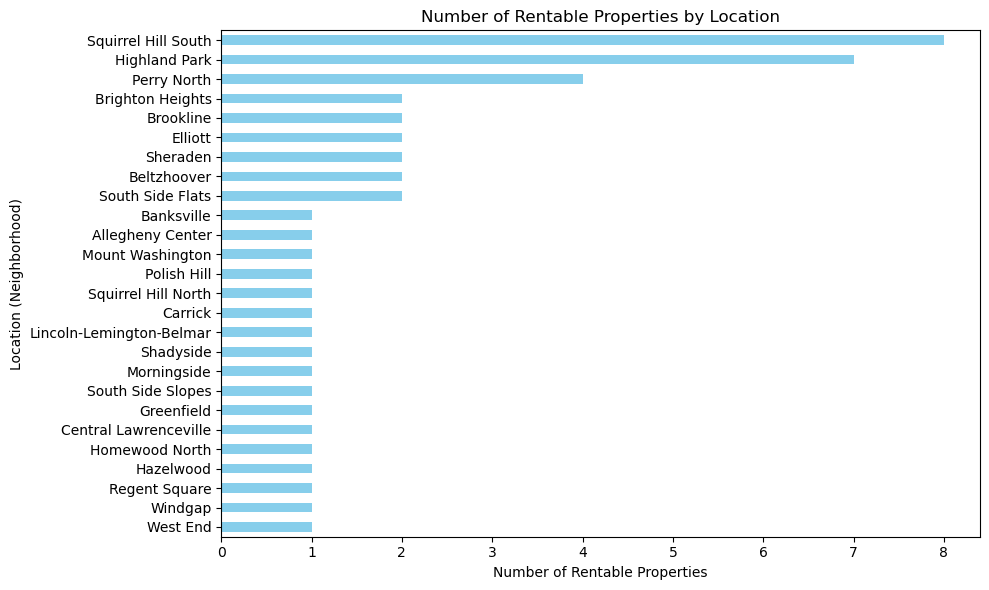

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data.csv'
data = pd.read_csv(file_path)

rentable_data = data[data['rentable'] == 't']

rentable_counts = rentable_data['neighborhood'].value_counts()

plt.figure(figsize=(10, 6))
rentable_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Rentable Properties by Location')
plt.xlabel('Number of Rentable Properties')
plt.ylabel('Neighborhood')
plt.tight_layout()

plt.savefig('rentable_properties_by_location.png')
plt.show()

## Facility Conclusions

Based on the data analysis, Highland Park stands out as the safest neighborhood, characterized by a lower number of rentable properties. This scarcity of rentable spaces as compared to Squirrl Hill South limits the inflow of potentially dangerous persons, thereby reducing the likelihood of potentially dangerous individuals moving into the area. With fewer opportunities for short-term residency, Highland Park fosters a more stable and tightly-knit community, which contributes to its overall safety. These findings suggest that the neighborhood's controlled accessibility plays a significant role in maintaining its secure and peaceful environment.

# Arrest Data

#### In order to have a safe city, one of the most important things we can look at is the arrest data. Thanks to the arrest dataset, we can see each arrest and group it in many different ways, including the type of arrest and location. With more serious crimes having a bigger weight, as well as a more dense area of crimes, we can put all of this data together to find the safest neighborhood.

To begin, we need to import our dataset. I labeled it "arrestInfo" so it will be easier to keep track of down the road.

![cuffs](https://c.tenor.com/bsmi3Ccn1iQAAAAC/handcuffs-prison.gif)

In [11]:
import pandas as pd
%matplotlib inline
arrestInfo = pd.read_csv('arrestData.csv')
arrestInfo

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66478,88274,2064627,23175998,40.0,M,W,2023-11-05T16:19:00,"1400 Block Sheffield ST Pittsburgh, PA 15233",3304 Criminal Mischief. / 3502 Burglary. / 392...,"1400 Block Sheffield ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.026065,40.453105
66479,88275,2064628,23179042,44.0,F,B,2023-11-11T03:41:00,"900 Block Brookline BL Pittsburgh, PA 15226",5104 Resisting Arrest or Other Law Enforcement...,"900 Block Brookline BL Pittsburgh, PA 15226",Brookline,6,1918.0,4.0,5.0,-80.019190,40.392879
66480,88276,2064629,23140205,18.0,M,B,2023-11-04T00:49:00,"6600 Block Frankstown AV Pittsburgh, PA 15206",2702 Aggravated Assault. / 2705 Recklessy Enda...,"N Murtland ST Pittsburgh, PA 15208",Homewood North,3,1302.0,NaN,NaN,NaN,NaN
66481,88277,2064630,23146375,32.0,M,B,2023-09-14T23:44:00,"1000 Block Airport BL Pittsburgh, PA 15231",9501 Bench Warrant,"1000 Block Airport BL Pittsburgh, PA 15231",Outside City,OSC,5599.0,NaN,NaN,-80.255272,40.496059


## Keeping It Simple

This dataset is a complete mess...there are columns that are helpfully labeled, but there is simply too much information to display. What we need to do is write some more code to categorize this data into what we really need.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2701 Simple Assault.'),
  Text(1, 0, '9015 Failure To Appear/Arrest on Attachment Order'),
  Text(2, 0, '9501 Bench Warrant'),
  Text(3, 0, '13(a)(32) Paraphernalia - Use or Possession'),
  Text(4, 0, '2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury'),
  Text(5, 0, '13(a)(31) Marijuana: Possession Small Amount'),
  Text(6, 0, '13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession'),
  Text(7, 0, '2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck'),
  Text(8, 0, '9093 Indirect Criminal Contempt'),
  Text(9, 0, '3929 Retail Theft.')])

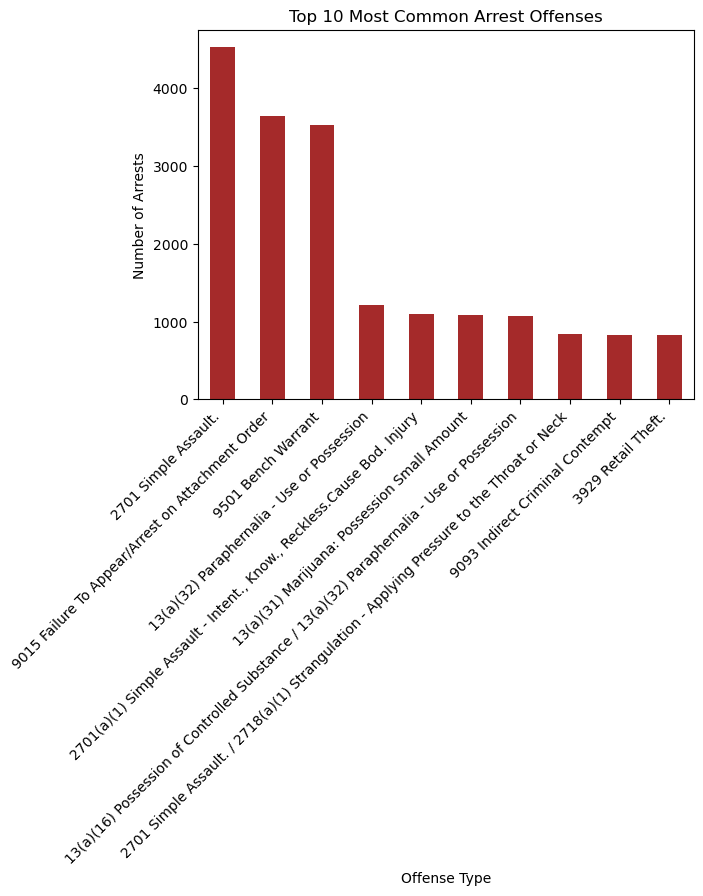

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each offense and select the top 10
offense_counts = arrestInfo['OFFENSES'].value_counts().head(10)

# Create a bar graph for the 10
offense_counts.plot(kind='bar', color='brown')
plt.title('Top 10 Most Common Arrest Offenses')
plt.xlabel('Offense Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels slightly

Okay...so now we need to take a look at our data. Seeing this information, there are two columns that are very similar to each other, two times. Failure to appear and bench warrant are pretty much the same, and so are the two columns for paraphernalia.

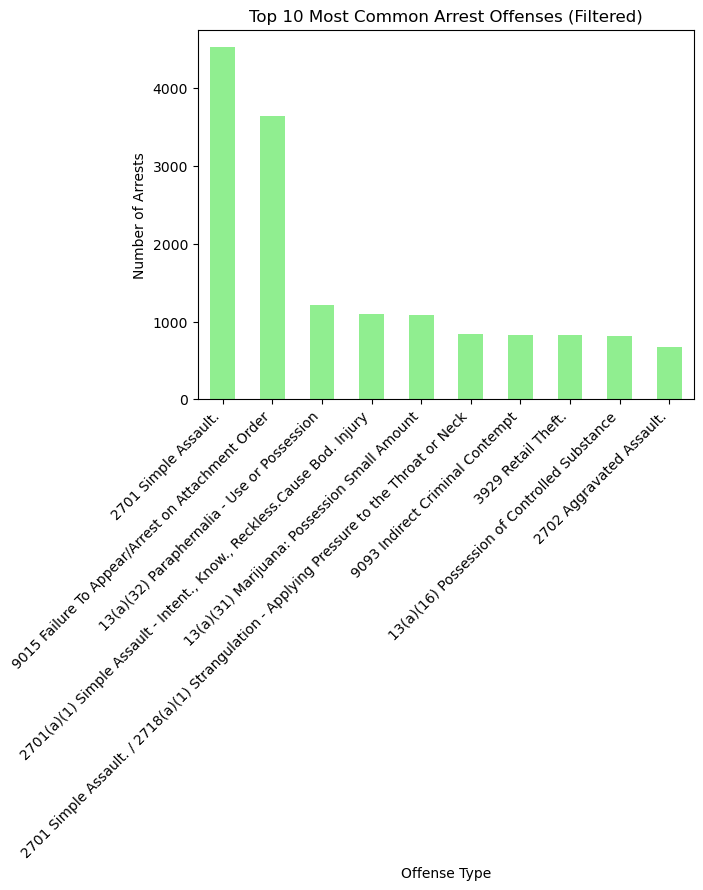

In [19]:
# Remove rows where the OFFENSES column has the value for warrant and paraphernalia

values_to_remove = ['9501 Bench Warrant', '13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession']
arrestInfo_filtered = arrestInfo[~arrestInfo['OFFENSES'].isin(values_to_remove)]

# Display the updated DataFrame
arrestInfo_filtered.head()

# Count the occurrences of each offense in the filtered data
offense_counts_filtered = arrestInfo_filtered['OFFENSES'].value_counts().head(10)

# Create a bar graph
offense_counts_filtered.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Common Arrest Offenses (Filtered)')
plt.xlabel('Offense Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.show()

Now, we have this information, but we need to implement it into actual neighborhoods.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mt. Oliver Neighborhood'),
  Text(1, 0, 'Troy Hill-Herrs Island'),
  Text(2, 0, 'Mt. Oliver Boro'),
  Text(3, 0, 'Central Northside'),
  Text(4, 0, 'Ridgemont'),
  Text(5, 0, 'Regent Square'),
  Text(6, 0, 'New Homestead'),
  Text(7, 0, 'Swisshelm Park'),
  Text(8, 0, 'Chartiers City'),
  Text(9, 0, 'East Carnegie')])

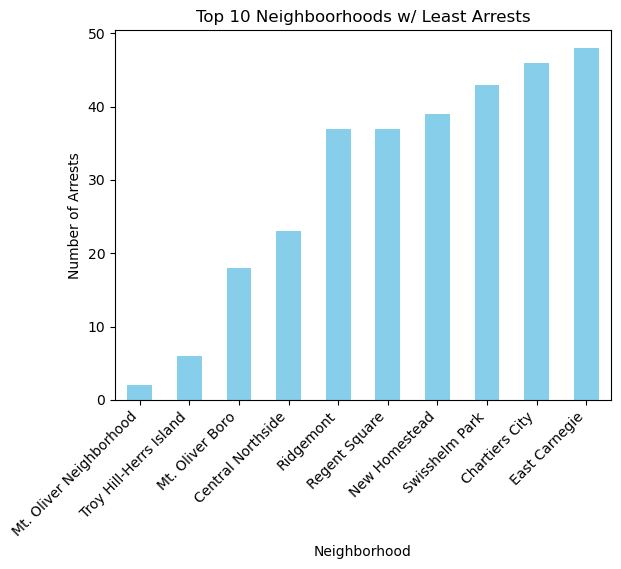

In [131]:
# Count the occurrences of each offense and select the top 10
offense_counts = arrestInfo['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True).head(10)

# Create a bar graph for the top 10 offenses
offense_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighboorhoods w/ Least Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels slightly

When we take a look at the most common crimes, it seems like we can sort them into two categories: physical crimes and non-physical ones. We want to be able to sort these low-crime neighborhoods with as minimal physical crimes as possible. For example, if New Homestead has more crimes then Regent Square, but Regent has more assaults, New Homestead is probably the safer neighborhood.

                         Total Incidents  Assault Cases
INCIDENTNEIGHBORHOOD                                   
Troy Hill-Herrs Island                 6            0.0
Central Northside                     23            1.0
Mt. Oliver Neighborhood                2            1.0
Mt. Oliver Boro                       18            5.0
Regent Square                         37            6.0
Ridgemont                             37            8.0
New Homestead                         39           14.0
Swisshelm Park                        43           19.0
East Carnegie                         48           21.0
Chartiers City                        46           22.0


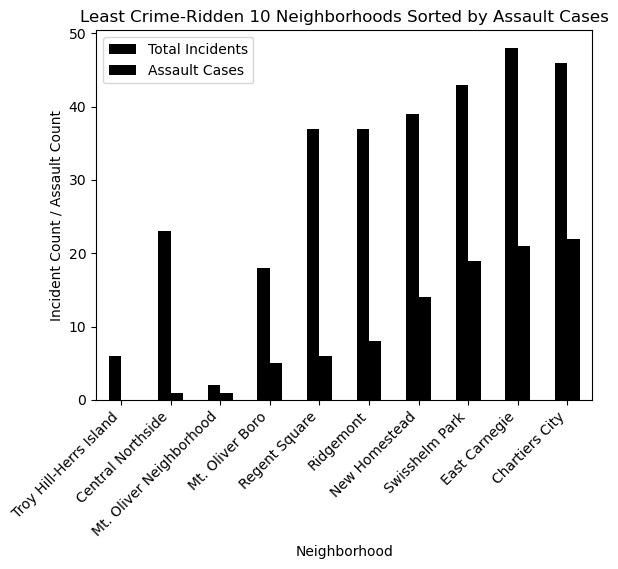

In [97]:
import pandas as pd

#Count incidents in each neighborhood and get the bottom 10 neighborhoods with the least incidents
neighborhood_incidents = arrestInfo['INCIDENTNEIGHBORHOOD'].value_counts().tail(10)

#Filter the arrest data to include only the bottom 10 neighborhoods
bottom10 = arrestInfo[arrestInfo['INCIDENTNEIGHBORHOOD'].isin(neighborhood_incidents.index)]

#Identify assault cases 
assault_cases = bottom10[bottom10['OFFENSES'].str.contains('Assault')]

#Count assault cases in each of the bottom 10 neighborhoods
assault_counts = assault_cases['INCIDENTNEIGHBORHOOD'].value_counts()

# Merge the assault count with the original neighborhood incidents to compare
neighborhood_info['Assault Cases'] = assault_counts

# Use fillna function for default cases
neighborhood_info['Assault Cases'] = neighborhood_info['Assault Cases'].fillna(0)

# Sort the neighborhoods by the number of assault cases in ascending order
neighborhood_info_sorted = neighborhood_info.sort_values(by='Assault Cases')

# Display the sorted neighborhoods with their incident and assault case counts
print(neighborhood_info_sorted)

neighborhood_info_sorted.plot(kind='bar', color='black')
plt.title('Least Crime-Ridden 10 Neighborhoods Sorted by Assault Cases')
plt.xlabel('Neighborhood')
plt.ylabel('Incident Count / Assault Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Arrest Data Conclusion

Overall there were many neighborhoods with not many cases, but there were a few that stood out. Thanks to the ability to compare the type of crime, and put it against the lowest crime-ridden neighborhoods, we were able to conclude that in my dataset, the safest neighborhood is Troy Hill-Herrs Island, with Central Northside and Mt. Oliver Neighborhood coming in close 2nd and 3rd places, respectively.


# Overall Conclusion

Overall, there were many aspects that went into choosing the safest neighborhood in Pittsburgh, including weapon seizure information, fire and police zones, and arrest data! When we finally pieced all of this information together, there was one neighborhood that stood out more than others. 

Regent Square!! In the first dataset, Regent was our winner because not only did it have a low amount of weapon seizures, they were also the least-deadly weapons. In our second dataset, while Regent didn't perform fantastically with the police and fire zones, there was only one rentable property there, which contributes to a neighborhood's safeness. Finally, in our third dataset, Regent Square came in the top 5 under the 